# Soal 13

1. [Dengan Boston dataset, klasifikasikan suburb mempunyai crime rate di atas atau di bawah median. Gunakan LDA, LR, dan KNN model menggunakan beberapa prediktor](#1)


## 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_boston

%matplotlib inline

In [2]:
boston = load_boston()
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)

In [3]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
df_boston['CRIM01'] = np.where(df_boston['CRIM'] > df_boston['CRIM'].median(), 1, 0)

In [5]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CRIM01
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,0


In [6]:
# hilangkan CRIM
df_boston = df_boston.drop('CRIM', axis=1)

In [7]:
df_boston.head()

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CRIM01
0,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,0
1,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,0
2,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,0
3,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,0
4,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,0


In [8]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
CRIM01     506 non-null int64
dtypes: float64(12), int64(1)
memory usage: 51.5 KB


In [9]:
df_boston.shape

(506, 13)

In [10]:
df_boston.corr()

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CRIM01
ZN,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,-0.436151
INDUS,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,0.603260
CHAS,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.070097
NOX,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,0.723235
RM,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,-0.156372
AGE,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,0.613940
DIS,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,-0.616342
RAD,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,0.619786
TAX,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,0.608741
PTRATIO,-0.391679,0.383248,-0.121515,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,0.253568


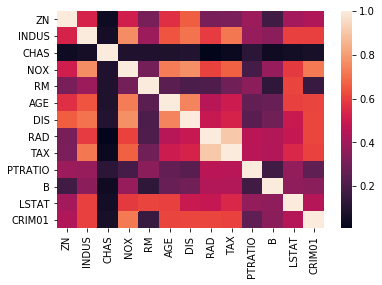

In [11]:
# heatmap corr menggunakan sns
sns.heatmap(abs(df_boston.corr()))

In [12]:
X_all = df_boston.iloc[:, :-1].values

In [13]:
X_all.shape

(506, 12)

Kita ambil prediktor yang memiliki korelasi di atas 0.5

In [14]:
X_pred = df_boston[['INDUS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX']].values

In [15]:
Y = df_boston['CRIM01'].values

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y, random_state=1)

In [17]:
# only significant dataset
X_train_sign, X_test_sign, Y_train_sign, Y_test_sign = train_test_split(X_pred, Y, random_state=1)

## Logistic Regression

In [18]:
LR = LogisticRegression()
LR.fit(X_train_sign, Y_train_sign)
accuracy = accuracy_score(Y_test_sign, LR.predict(X_test_sign))
print('LR significant predictor => ', accuracy)
LR.fit(X_train, Y_train)
accuracy = accuracy_score(Y_test, LR.predict(X_test))
print('LR all predictor => ', accuracy)

LR significant predictor =>  0.84251968503937
LR all predictor =>  0.8582677165354331


## Linear Discriminant Analysis

In [19]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train_sign, Y_train_sign)
accuracy = accuracy_score(Y_test_sign, LDA.predict(X_test_sign))
print('LDA significant predictor => ', accuracy)
LDA.fit(X_train, Y_train)
accuracy = accuracy_score(Y_test, LDA.predict(X_test))
print('LDA all predictor => ', accuracy)

LDA significant predictor =>  0.8188976377952756
LDA all predictor =>  0.8346456692913385


## Quadratic Discriminant Analysis

In [20]:
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train_sign, Y_train_sign)
accuracy = accuracy_score(Y_test_sign, QDA.predict(X_test_sign))
print('QDA significant predictor => ', accuracy)
QDA.fit(X_train, Y_train)
accuracy = accuracy_score(Y_test, QDA.predict(X_test))
print('LR all predictor => ', accuracy)

QDA significant predictor =>  0.8740157480314961
LR all predictor =>  0.905511811023622


## K Nearest Neighbors

In [21]:
best_accuracy = 0
best_K_value = 0

for K in range(1, 101):
    KNN = KNeighborsClassifier(n_neighbors=K)
    KNN.fit(X_train_sign, Y_train_sign)
    accuracy = accuracy_score(Y_test_sign, KNN.predict(X_test_sign))
    print('KNN significant predictor => K = {} dan Akurasi = {:.3f}'.format(K, accuracy))
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_K_value = K
print('******************************************************')
print('KNN significant predictor => K = {} dan Akurasi = {:.3f}'.format(best_K_value, best_accuracy))

KNN significant predictor => K = 1 dan Akurasi = 0.937
KNN significant predictor => K = 2 dan Akurasi = 0.921
KNN significant predictor => K = 3 dan Akurasi = 0.921
KNN significant predictor => K = 4 dan Akurasi = 0.913
KNN significant predictor => K = 5 dan Akurasi = 0.906
KNN significant predictor => K = 6 dan Akurasi = 0.913
KNN significant predictor => K = 7 dan Akurasi = 0.882
KNN significant predictor => K = 8 dan Akurasi = 0.882
KNN significant predictor => K = 9 dan Akurasi = 0.882
KNN significant predictor => K = 10 dan Akurasi = 0.874
KNN significant predictor => K = 11 dan Akurasi = 0.882
KNN significant predictor => K = 12 dan Akurasi = 0.882
KNN significant predictor => K = 13 dan Akurasi = 0.882
KNN significant predictor => K = 14 dan Akurasi = 0.858
KNN significant predictor => K = 15 dan Akurasi = 0.858
KNN significant predictor => K = 16 dan Akurasi = 0.843
KNN significant predictor => K = 17 dan Akurasi = 0.835
KNN significant predictor => K = 18 dan Akurasi = 0.843
K

In [22]:
best_accuracy = 0
best_K_value = 0

for K in range(1, 101):
    KNN = KNeighborsClassifier(n_neighbors=K)
    KNN.fit(X_train, Y_train)
    accuracy = accuracy_score(Y_test, KNN.predict(X_test))
    print('KNN all predictor => K = {} dan Akurasi = {:.3f}'.format(K, accuracy))
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_K_value = K
print('******************************************************')
print('KNN all predictor => K = {} dan Akurasi = {:.3f}'.format(best_K_value, best_accuracy))

KNN all predictor => K = 1 dan Akurasi = 0.937
KNN all predictor => K = 2 dan Akurasi = 0.929
KNN all predictor => K = 3 dan Akurasi = 0.921
KNN all predictor => K = 4 dan Akurasi = 0.921
KNN all predictor => K = 5 dan Akurasi = 0.921
KNN all predictor => K = 6 dan Akurasi = 0.913
KNN all predictor => K = 7 dan Akurasi = 0.890
KNN all predictor => K = 8 dan Akurasi = 0.882
KNN all predictor => K = 9 dan Akurasi = 0.898
KNN all predictor => K = 10 dan Akurasi = 0.890
KNN all predictor => K = 11 dan Akurasi = 0.874
KNN all predictor => K = 12 dan Akurasi = 0.843
KNN all predictor => K = 13 dan Akurasi = 0.858
KNN all predictor => K = 14 dan Akurasi = 0.827
KNN all predictor => K = 15 dan Akurasi = 0.835
KNN all predictor => K = 16 dan Akurasi = 0.827
KNN all predictor => K = 17 dan Akurasi = 0.835
KNN all predictor => K = 18 dan Akurasi = 0.827
KNN all predictor => K = 19 dan Akurasi = 0.827
KNN all predictor => K = 20 dan Akurasi = 0.827
KNN all predictor => K = 21 dan Akurasi = 0.811
K

[kembali ke atas](#Soal-13)